In [1]:
### Sri Balaji Muruganandam
### AAAMLP Book - Evaluation Metrics(Abhishek Thagur Book)
### Metrics - Classification & Regression
### Notebook - 3

In [2]:
"""
References
https://www.youtube.com/watch?v=2osIZ-dSPGE
https://www.mage.ai/blog/definitive-guide-to-accuracy-precision-recall-for-product-developers
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
https://www.youtube.com/watch?v=gZmOmgQns3c  -- best video
https://www.youtube.com/watch?v=_AjhdXuXEDE
https://www.youtube.com/watch?v=4jRBRDbJemM -- StatQuest ROC & AUC
"""

'\nReferences\nhttps://www.youtube.com/watch?v=2osIZ-dSPGE\nhttps://www.mage.ai/blog/definitive-guide-to-accuracy-precision-recall-for-product-developers\n\n'

In [3]:
import numpy as np
import pandas as pd
import os
import inspect
import matplotlib.pyplot as plt

In [4]:
### If there are equal number of positive and negative samples in binary classification we use
### the metrics of - accuracy, precision, recall and F1

# Function to calculate accuracy - MANUAL Method

def accuracy(actual,predict):
    ## Abhi's approch
    ## Initialize a simple counter for correct predictions
    count = 0
    
    for act,pred in zip(actual,predict):
        if(act==pred):
            count+=1
        
    return count/len(actual)
    

In [5]:
# Function to calculate accuracy - Scikit Learn
actual = [0,1,1,1,0,0,1,1]
predict = [0,0,1,1,1,0,1,1]

from sklearn import metrics

accuracy = metrics.accuracy_score(actual,predict)
accuracy

0.75

In [6]:
### Whenever the data is skewed 180 positives and 20 negatives - Don't use accuracy
### Use precisions -  know TP,TN, FP,FN (Confusion Matrix)

"""
Functions to calculate - True positive, True Negative, False Positive, False Negative
We are going to use sklearn inbuilt functions, We can also create our own functions manually
"""

## ACCURACY SCORE = (TP+TN)/(TP+TN+FP+FN) -- This is our usual accuracy metrics for classification

"""
Note: Abhi has manually all the code for TP,TN, FP,FN, Precision, accuracy, recall etc...
Know the concepts well and use built-in functions from sklearn
"""

metrics.confusion_matrix(actual,predict)

array([[2, 1],
       [1, 4]])

In [7]:
### Precision

"""
PRECISION = TP / (TP + FP)
"""

## We can say Precisoin is the probability/likelihood of the model to predict positive cases or negative cases
## How well your model predicts a specific category
## For multiclass There will be precision for each class

'\nPRECISION = TP / (TP + FP)\n'

In [8]:
## IMPORTANT
"""
For precisions, think of predictions as your base

For Recall, think of truth as your base
"""

'\nFor precisions, think of predictions as your base\n\nFor Recall, think of truth as your base\n'

In [9]:
### Recall is from positive actual values how many are correctly identified

"""
RECALL = TP / (TP + FN)
"""

### How well the model identified the positive cases is recall

'\nRECALL = TP / (TP + FN)\n'

In [10]:
### For a good model our precision and recall should be high

"""
When do we need high precision or high recall? 
Models need high recall when you need output-sensitive predictions. 
For example, predicting cancer or predicting terrorists needs a high recall, in other words, 
you need to cover false negatives as well.
"""

### F1 score is the overall health of the model


### Tentative intution
"""
If recall is high it provides less false negatives. If precison is high it provides less false positives
"""

'\nIf recall is high it provides less false negatives. If precison is high it provides less false positives\n'

In [11]:
"""
Importance of threshold
Many ML models predict the probability where we have to set a threshold(usually be 0.5)
But for domains and cases the threshold should be changed to know the best threshold value we can use
Precision- Recall curve - pg(39)
"""

actual_val = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

pred_prob = [0.02638412, 0.11114267, 0.31620708,
0.0490937, 0.0191491, 0.17554844,
0.15952202, 0.03819563, 0.11639273,
0.079377, 0.08584789, 0.39095342,
0.27259048, 0.03447096, 0.04644807,
0.03543574, 0.18521942, 0.05934905,
0.61977213, 0.33056815]


In [16]:
precisions = []
recalls = []


# a set of threshold values - ways to find it will be explained later - Abhi's code
thresholds = [0.0490937 , 0.05934905, 0.079377,
0.08584789, 0.11114267, 0.11639273,
0.15952202, 0.17554844, 0.18521942,
0.27259048, 0.31620708, 0.33056815,
0.39095342, 0.61977213]


## From the thresholds we are calculating the predicted values
### I have slightly modified the Abhi's code - I used sklearn functions instead of manual coding
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in pred_prob]    #predicting with ith threshold
    p = metrics.precision_score(actual_val,temp_prediction)      #calculating pre and recall with sklearn
    r = metrics.recall_score(actual_val,temp_prediction)
    precisions.append(p)
    recalls.append(r)

In [17]:
print(precisions)

[0.21428571428571427, 0.15384615384615385, 0.16666666666666666, 0.18181818181818182, 0.1, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.5, 1.0]


In [18]:
print(recalls)

[1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


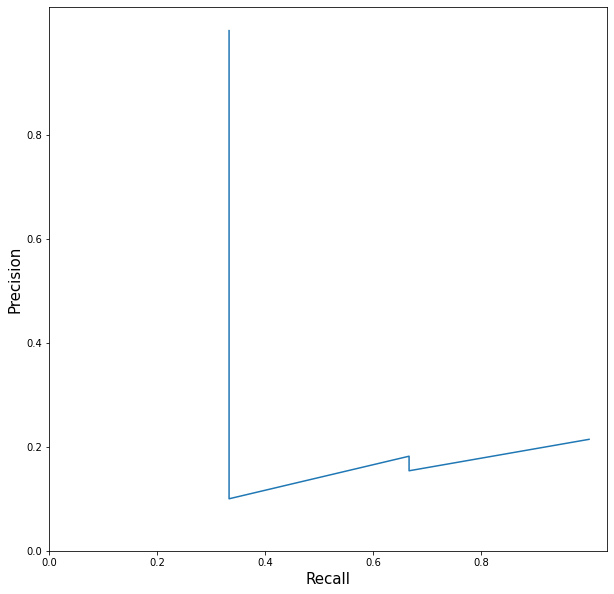

In [26]:
### Always use plots -- to find and visualize best values if you have a lot of hyperparameter options
"""
Precision-Recall Curve
"""

#Reassigning tick values 0 to 1 (as precison and recall values will be within 0 and 1)

plt.figure(figsize=(10,10))
plt.plot(recalls,precisions)
plt.xlabel("Recall",fontsize=15)
plt.ylabel("Precision",fontsize=15)
plt.xticks(np.arange(0, 1, step=0.2))
plt.yticks(np.arange(0, 1, step=0.2))
plt.show()

In [27]:
"""
The precision-recall curve shows the tradeoff between precision and recall 
for different threshold. A high area under the curve represents both high 
recall and high precision, where high precision relates to a low false 
positive rate, and high recall relates to a low false negative rate.
"""

'\nThe precision-recall curve shows the tradeoff between precision and recall \nfor different threshold. A high area under the curve represents both high \nrecall and high precision, where high precision relates to a low false \npositive rate, and high recall relates to a low false negative rate.\n'

In [28]:
### Browse to see the actual curve 
### Always choose a value that has more area under the curve so that we can get more precision and recall
### check the youtube link in the reference

In [29]:
"""
F1 score is the simple weighted average (harmonic mean) of precison and recall

F1 = 2PR/(P+R)
(or)
F1 = 2TP / (2TP+FP+FN)

We can have F1, F0.5, F2 score -- what we call as F beta score - check kris video :)
"""

def f1_score(actual,predict):
    p = metrics.precision_score(actual,predict)
    r = metrics.recall_score(actual,predict)
    
    f1 = (2*p*r)/(p+r)
    return f1

f1_score(actual,predict)

0.8000000000000002

In [31]:
## using sklearn f1 function
metrics.f1_score(actual,predict)

0.8000000000000002

In [ ]:
## F1 Score also range from 0 to 1

In [32]:
# Also, All the three are same
"""
True Positive Rate - TPR
Recall
Sensitivity
"""

'\nTrue Positive Rate - TPR\nRecall\nSensitivity\n'

In [34]:
"""
True Negative Rate(TNR) or False positive rate or Specificity
"""

## But TPR and TNR are the most commonly used term

'\nTrue Negative Rate(TNR) or False positive rate or Specificity\n'

In [48]:
### TPR and TNR can also be calculated for different threshold values
tpr_ls = []
fpr_ls = []

# a set of threshold values - ways to find it will be explained later - Abhi's code
thresholds = [0.0490937 , 0.05934905, 0.079377,
0.08584789, 0.11114267, 0.11639273,
0.15952202, 0.17554844, 0.18521942,
0.27259048, 0.31620708, 0.33056815,
0.39095342, 0.61977213]


## From the thresholds we are calculating the predicted values
### I have slightly modified the Abhi's code - I used sklearn functions instead of manual coding
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in pred_prob]    #predicting with ith threshold
    matrix = metrics.confusion_matrix(actual_val,temp_prediction)
    tpr = matrix[0,0]/(matrix[0,0]+matrix[1,0])
    fpr = matrix[0,1]/(matrix[0,1]+matrix[1,1])
    tpr_ls.append(tpr)
    fpr_ls.append(fpr)

rate = pd.DataFrame(list(zip(thresholds,tpr_ls,fpr_ls)), columns=["Threshold","TPR","FPR"])
rate

,Threshold,TPR,FPR
0,0.049094,1.000000,0.785714
1,0.059349,0.857143,0.846154
2,0.079377,0.875000,0.833333
3,0.085848,0.888889,0.818182
4,0.111143,0.800000,0.900000
5,0.116393,0.818182,0.888889
6,0.159522,0.833333,0.875000
7,0.175548,0.846154,0.857143
8,0.185219,0.857143,0.833333
9,0.272590,0.866667,0.800000


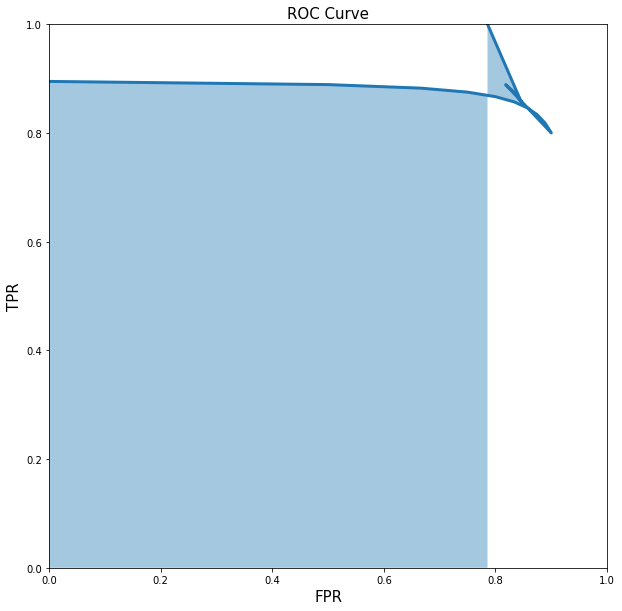

In [49]:
## Check the book for Abhi's values

plt.figure(figsize=(10,10))
plt.fill_between(fpr_ls,tpr_ls,alpha=0.4)
plt.plot(fpr_ls,tpr_ls,lw=3)
plt.title("ROC Curve",fontsize=15)
plt.xlabel("FPR",fontsize=15)
plt.ylabel("TPR",fontsize=15)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.show()

In [ ]:
# The curve is called as Receiver Operating Characteristics(ROC) - very useful when we have skewed binary targets
# The Area under the curve is Area under ROC Curve(AUC) 

In [52]:
## Now we are using roc inbuilt function direcrtly

y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]

y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]

metrics.roc_curve(y_true,y_pred)

# Note: roc_curve gives three values - tpr,tnr, threshold
## the third list are threshold

(array([0. , 0. , 0. , 0.1, 0.1, 0.3, 0.6, 0.7, 1. ]),
 array([0. , 0.2, 0.4, 0.4, 0.8, 0.8, 0.8, 1. , 1. ]),
 array([1.99, 0.99, 0.9 , 0.85, 0.66, 0.5 , 0.3 , 0.2 , 0.05]))

In [53]:
metrics.roc_auc_score(y_true,y_pred)   ## AUC value range from 0 to 1

0.8300000000000001

In [54]:
## ROC and AUC is used in binary classification problem especially to find best thresholds
## We can find TPR and TNR and plot for various threshold to get ROC(for a specific classification model)
## We can try with multiple models and plot the ROC for multiple classification models (with color variation and less transparency)
## Check which AUC is higher among different classification models -- choose the model with highest AUC